In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import scipy

import nsfg
import matplotlib
import thinkstats2
import thinkplot
import pandas

In [2]:
# Q1
resp= nsfg.ReadFemResp()

In [3]:
# Q2
time = resp["timesmar"].dropna()
jin = resp["jintendn"].dropna()
time_mean = time.mean()
jin_mean = jin.mean()
time_std = time.std()
jin_std = jin.std()

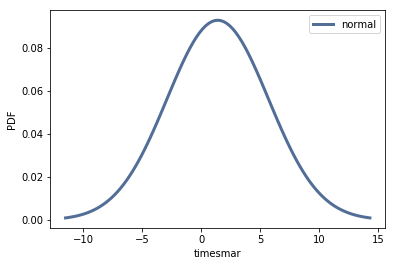

In [4]:
# Q3
norm_time = thinkstats2.NormalPdf(time_mean, time_std)
norm_time.Density(time_mean + time_std)
thinkplot.Pdf(norm_time, label='normal')
thinkplot.Config(xlabel='timesmar', ylabel='PDF')

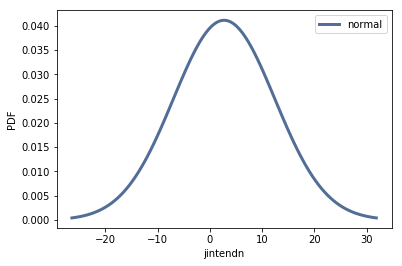

In [5]:
norm_jin = thinkstats2.NormalPdf(jin_mean, jin_std)
norm_jin.Density(jin_mean + jin_std)
thinkplot.Pdf(norm_jin, label='normal')
thinkplot.Config(xlabel='jintendn', ylabel='PDF')

Q4
- we can notice that both graphs almost the same mean and std the observed differences are that the second one stretch more on the x-axis but it PDF is less than the first one

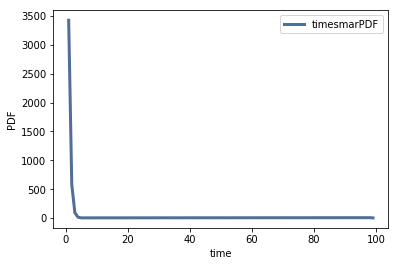

In [6]:
# Q5
time_pdf = thinkstats2.Hist(time)
thinkplot.Pdf(time_pdf, label="timesmarPDF")
thinkplot.config(xlabel="time", ylabel="PDF")

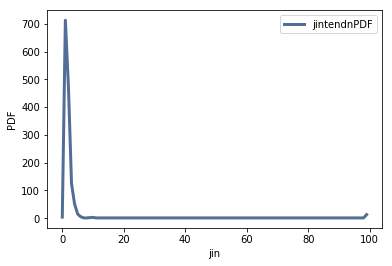

In [7]:
jin_pdf = thinkstats2.Hist(jin)
thinkplot.Pdf(jin_pdf, label="jintendnPDF")
thinkplot.config(xlabel="jin", ylabel="PDF")

In [8]:
# Q6
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum_list = [(x - mean)**k for x in xs]
    return sum(sum_list) / len(sum_list)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [9]:
skewness_time=Skewness(time)
PMS_time=PearsonMedianSkewness(time)
print ("Skewnees, PearsonMedianSkewness: %f, %f"%(skewness_time, PMS_time))

Skewnees, PearsonMedianSkewness: 22.219307, 0.270254


In [10]:
skewness_jin=Skewness(jin)
PMS_jin=PearsonMedianSkewness(jin)
print ("Skewnees, PearsonMedianSkewness: %f, %f"%(skewness_jin, PMS_jin))

Skewnees, PearsonMedianSkewness: 9.686914, 0.527037


Q7
- As we can see in both cases the skewenees is positive which refer to that the median is greater than the mean.
- and since Pearson's skewness is positive that means that the distribution of both timesmar and jintendn are slightly skewed to the right.

In [11]:
# Q8
def SampleRows(df, nrows, replace=False):
    # replace = same row could be chosen more than one or not
    indices = np.random.choice(df.index, nrows, replace=replace)
    print(indices)
    sample = df.loc[indices]
    return sample

In [12]:
sample = SampleRows(resp, 5000)

[7345 4786 5011 ..., 3291 7441 4377]


In [13]:
time_sample = sample.timesmar
jin_sample=sample.jintendn

In [14]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values
jit_time = Jitter(time_sample, 1.4)
jit_jin = Jitter(jin_sample, 0.5)

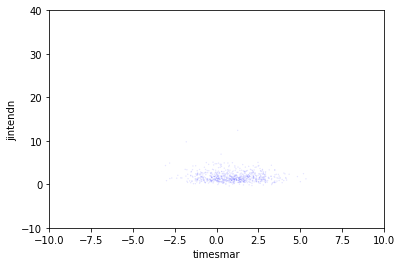

In [15]:
thinkplot.Scatter(jit_time, jit_jin, alpha=0.1, s=2)
thinkplot.Config(xlabel='timesmar',
                 ylabel='jintendn',
                 axis=[-10,10, -10, 40],
                 legend=False)

In [16]:
# Q9
cleaned = resp.dropna(subset=["timesmar", "jintendn"])

In [17]:
bins = np.arange(1, 100, 1)
indices = np.digitize(cleaned.timesmar, bins)
groups = cleaned.groupby(indices)
mean_times = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]

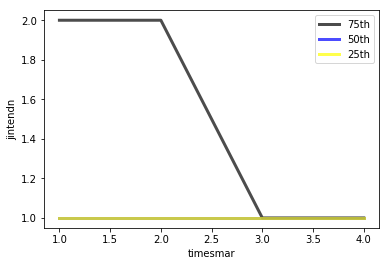

In [20]:
CustomColors = ["black","blue","yellow"]
percent = [75, 50, 25]
for i in range(len(percent)):
    jin_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_times, jin_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='timesmar',
                 ylabel='jintendn',
                 legend=True)

In [ ]:
# Q11
spearsman_corr = scipy.stats.spearmanr(cleaned.timesmar, cleaned.jintendn)
spearsman_corr

In [ ]:
pearson_corr = scipy.stats.pearsonr(cleaned.timesmar, cleaned.jintendn)
pearson_corr

Q12
- The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.
- While the Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.